<a href="https://colab.research.google.com/github/rohitpaul09/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name   - Play Store App Review Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/rohitpaul09/Play-Store-App-Review-Analysis

# **Problem Statement**


The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. Each app (row) has values for category, rating, size, and more. Another dataset contains customer reviews of the android apps. Explore and analyze the data to discover key factors responsible for app engagement and success.

#### **Define Your Business Objective?**

Analyze the Play Store apps dataset using Python, uncovering key factors for app engagement and success, and provide valuable insights to optimize app performance in the Android market.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [19]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [2]:
# mount the drive and read required data
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [115]:
# Load Dataset
df_psdata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/2_Numpy Module/chap_21_Capstone Project/Play Store Data.csv')
df_review=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/2_Numpy Module/chap_21_Capstone Project/User Reviews.csv')


### Dataset First View

In [59]:
# Dataset First Look
# Display the Play Store App data
print('Play Store Data Overview:')
df_psdata.head()


Play Store Data Overview:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [60]:
# Display the User Reviews data
print('User Reviews Data Overview:')
df_review.head()


User Reviews Data Overview:


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
print('Play Store Data Rows count:',df_psdata.shape[0])
print('Play Store Data Columns count:',df_psdata.shape[1])
print('User Reviews Data Rows count:',df_review.shape[0])
print('User Reviews Data Columns count:',df_review.shape[1])


Play Store Data Rows count: 10841
Play Store Data Columns count: 13
User Reviews Data Rows count: 64295
User Reviews Data Columns count: 5


### Dataset Information

In [10]:
# Dataset Info
print('Play Store Data Info:')
df_psdata.info()
print('\n')
print('User Reviews Data Info:')
df_review.info()


Play Store Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


User Reviews Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Co

#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
print('Play Store Data Duplicate Value Count:',len(df_psdata[df_psdata.duplicated()]))
print('User Reviews Data Duplicate Value Count:',len(df_review[df_review.duplicated()]))


Play Store Data Duplicate Value Count: 483
User Reviews Data Duplicate Value Count: 33616


#### Missing Values/Null Values

In [32]:
# Missing Values/Null Values Count
# Function to calculate the percentage of null values in each column
def null_percent(data_fm):
    null_info = pd.DataFrame(index=data_fm.columns)
    null_info["datatype"] = data_fm.dtypes
    null_info["not null values"] = data_fm.count()
    null_info["null value"] = data_fm.isnull().sum()
    null_info["null value(%)"] = round(data_fm.isnull().mean() * 100, 2)
    return null_info

# Display the percentage of null values for Play Store Data
print('Null value % in Play Store Data:', null_percent(df_psdata), sep='\n')
print('\n')
# Display the percentage of null values for User Reviews Data
print('Null value % in User Reviews Datas:', null_percent(df_review), sep='\n')


Null value % in Play Store Data:
               datatype  not null values  null value  null value(%)
App              object            10841           0           0.00
Category         object            10841           0           0.00
Rating          float64             9367        1474          13.60
Reviews          object            10841           0           0.00
Size             object            10841           0           0.00
Installs         object            10841           0           0.00
Type             object            10840           1           0.01
Price            object            10841           0           0.00
Content Rating   object            10840           1           0.01
Genres           object            10841           0           0.00
Last Updated     object            10841           0           0.00
Current Ver      object            10833           8           0.07
Android Ver      object            10838           3           0.03


Null value % 

Null Value Heatmap for Play Store Data


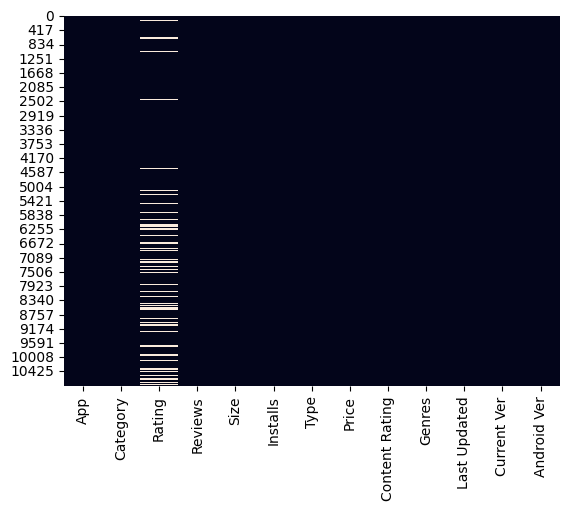

In [13]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap for Play Store Data
print('Null Value Heatmap for Play Store Data')
sns.heatmap(df_psdata.isnull(), cbar=False)
plt.show()


Null Value Heatmap for User Reviews Data


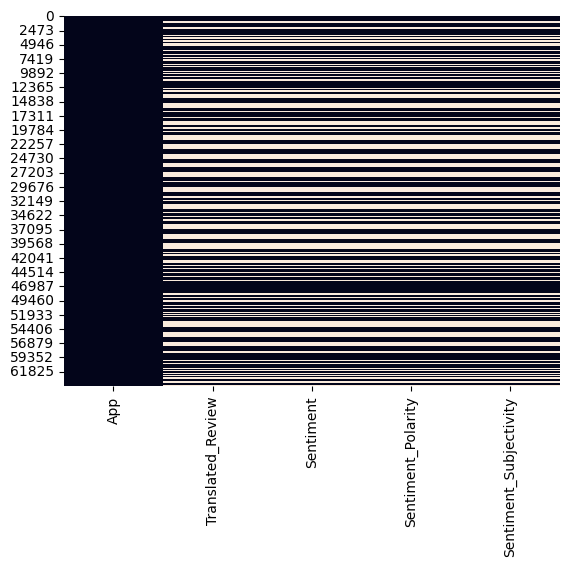

In [14]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap for User Reviews Data
print('Null Value Heatmap for User Reviews Data')
sns.heatmap(df_review.isnull(), cbar=False)
plt.show()


### What did you know about your dataset?

- The datasets are associated with the mobile application industry, focusing on the Android platform.
- Play Store dataset: 10,841 rows, 13 columns, 483 instances of duplicated rows.
  - Missing values in columns: 'Rating' (13.60% null values), 'Type' (0.01% null values), 'Content Rating' (0.01% null values), 'Current Ver' (0.07% null values), 'Android Ver' (0.03% null values).
- User reviews dataset: 64,295 rows, 5 columns, 33,616 instances of duplicated rows.
  - Missing values in columns: 'Translated_Review' (41.79% null value), 'Sentiment' (41.78% null value), 'Sentiment_Polarity' (41.78% null values), 'Sentiment_Subjectivity' (41.78% null values).
- Primary aim: Uncover key factors contributing to app engagement and success in the Android market using this data.

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
print('Play Store Dataset Columns:',df_psdata.columns,sep='\n',end='\n\n')
print('User Reviews Dataset Columns:',df_review.columns,sep='\n')


Play Store Dataset Columns:
Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

User Reviews Dataset Columns:
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


In [16]:
# Dataset Describe
print('Play Store Dataset Description:',df_psdata.describe(include='all'),sep='\n',end='\n\n')
print('User Reviews Dataset Description:',df_review.describe(include='all'),sep='\n')


Play Store Dataset Description:
           App Category       Rating Reviews                Size    Installs  \
count    10841    10841  9367.000000   10841               10841       10841   
unique    9660       34          NaN    6002                 462          22   
top     ROBLOX   FAMILY          NaN       0  Varies with device  1,000,000+   
freq         9     1972          NaN     596                1695        1579   
mean       NaN      NaN     4.193338     NaN                 NaN         NaN   
std        NaN      NaN     0.537431     NaN                 NaN         NaN   
min        NaN      NaN     1.000000     NaN                 NaN         NaN   
25%        NaN      NaN     4.000000     NaN                 NaN         NaN   
50%        NaN      NaN     4.300000     NaN                 NaN         NaN   
75%        NaN      NaN     4.500000     NaN                 NaN         NaN   
max        NaN      NaN    19.000000     NaN                 NaN         NaN   

       

### Variables Description

📊**Variable Descriptions for Play Store Dataset:**

- **App:** Name of the application along with an optional short description.

- **Category:** Category to which the app belongs.

- **Rating:** Average rating given by users.

- **Reviews:** Total number of user reviews for the application.

- **Size:** Size occupied by the application on a mobile phone.

- **Installs:** Total number of installations or downloads for the application.

- **Type:** Indicates whether the app is free or paid.

- **Price:** The cost to install the app. For free apps, the price is zero.

- **Content Rating:** Indicates whether the app is suitable for all age groups.

- **Genres:** Various categories to which an application can belong.

- **Last Updated:** Date when the application was last updated.

- **Current Ver:** Current version of the application.

- **Android Ver:** Android version that supports the application on its platform.


📊**Variable Descriptions for User Reviews Dataset:**

- **App:** Name of the app with an optional short description.

- **Translated_Review:** English translation of the user's review.

- **Sentiment:** Attitude or emotion of the writer, categorized as 'Positive', 'Negative', or 'Neutral'.

- **Sentiment_Polarity:** Polarity of the review, ranging from -1 (Negative) to 1 (Positive).

- **Sentiment_Subjectivity:** Indicates how closely a reviewer's opinion aligns with the general public's opinion, with a range of [0, 1]. Higher values suggest opinions closer to the general public, while lower values indicate more factual information in the review.

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.

print('Unique Values for each variable in Play Store Dataset:',end='\n\n')

for i in df_psdata.columns.tolist():
  print("No. of unique values in ",i,"is ->",df_psdata[i].nunique())

print('\n')

print('Unique Values for each variable in User Reviews Dataset:',end='\n\n')

for i in df_review.columns.tolist():
  print("No. of unique values in ",i,"is ->",df_review[i].nunique())


Unique Values for each variable in Play Store Dataset:

No. of unique values in  App is -> 9660
No. of unique values in  Category is -> 34
No. of unique values in  Rating is -> 40
No. of unique values in  Reviews is -> 6002
No. of unique values in  Size is -> 462
No. of unique values in  Installs is -> 22
No. of unique values in  Type is -> 3
No. of unique values in  Price is -> 93
No. of unique values in  Content Rating is -> 6
No. of unique values in  Genres is -> 120
No. of unique values in  Last Updated is -> 1378
No. of unique values in  Current Ver is -> 2832
No. of unique values in  Android Ver is -> 33


Unique Values for each variable in User Reviews Dataset:

No. of unique values in  App is -> 1074
No. of unique values in  Translated_Review is -> 27994
No. of unique values in  Sentiment is -> 3
No. of unique values in  Sentiment_Polarity is -> 5410
No. of unique values in  Sentiment_Subjectivity is -> 4474


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [116]:
# Print the rows with non-numeric characters in the 'Reviews' column
non_numeric_reviews = df_psdata[df_psdata['Reviews'].str.contains(r'\D')]
print("Rows with non-numeric characters in 'Reviews' column:")
non_numeric_reviews


Rows with non-numeric characters in 'Reviews' column:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [117]:
# The row at index 10472 contains data that is entirely incorrect or irrelevant.
# The row is deemed unusable or misleading for the analysis, and removing it ensures the integrity and accuracy of the overall dataset.
df_psdata = df_psdata.drop(index=10472)

# Resetting the index ensures that the DataFrame has continuous and ordered indices after dropping a row.
df_psdata = df_psdata.reset_index(drop=True)


In [118]:
# Convert the 'Reviews' column to integer datatype
df_psdata['Reviews'] = df_psdata['Reviews'].astype(int)


In [119]:
# Convert the 'Last Updated' column to datetime format
df_psdata['Last Updated'] = pd.to_datetime(df_psdata['Last Updated'])


In [120]:
# Creating a function drop_dollar, which drops the $ symbol if present and returns the value as a float.
def drop_dollar(value):

    if '$' in value:
        return float(value[1:])
    else:
        return float(value)

# Applying the drop_dollar function to the 'Price' column
df_psdata['Price'] = df_psdata['Price'].apply(lambda x: drop_dollar(x))


In [121]:
# Defining a function drop_plus that removes the '+' symbol if present and returns the result as an integer.

def drop_plus(value):
    '''
    This function drops the + symbol if present and returns the value with int datatype.
    If the value is not a valid integer, return 0.
    '''
    try:
        if '+' and ',' in value:
            return int(value[:-1].replace(',', ''))
        elif '+' in value:
            return int(value[:-1])
        else:
            return int(value)
    except ValueError:
        return 0
    '''
    The 'Installs' column now contains integer values representing the minimum number of times an app has been installed.
    An 'Installs' value of 0 means the app has not been installed.
    An 'Installs' value of 1 means the app has been installed at least once.
    An 'Installs' value of 1,000,000 means the app has been installed by at least one million users, and so on.
    '''
# The drop_plus function applied to the 'Installs' column
df_psdata['Installs'] = df_psdata['Installs'].apply(lambda x: drop_plus(x))


In [122]:
# Defining a function to convert all the entries in KB to MB and then converting them to float datatype.

def kb_to_mb(entry):
    '''
    Converts size entries to MB. Returns as a float if in megabytes (M), or converts and rounds to 4 decimal places if in kilobytes (k).
    Returns the original entry if not in either format or if any conversion exception occurs.
    '''
    try:
        if 'M' in entry:
            return float(entry[:-1])
        elif 'k' in entry:
            return round(float(entry[:-1]) / 1024, 4)
        else:
            return entry
    except:
        return entry

# The kb_to_mb funtion applied to the size column
df_psdata['Size'] = df_psdata['Size'].apply(lambda x: kb_to_mb(x))


In [123]:
# Verifying the data type information after type conversion
print('Play Store Updated Data Info:')
df_psdata.info()


Play Store Updated Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            10840 non-null  object        
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.1+ MB


In [124]:
print('Shape Before Removing Duplicates:')
# Dataset Rows & Columns count
print('Play Store Data Rows count:',df_psdata.shape[0])
print('Play Store Data Columns count:',df_psdata.shape[1])
print('User Reviews Data Rows count:',df_review.shape[0])
print('User Reviews Data Columns count:',df_review.shape[1],end='\n\n')

# Remove duplicates
df_review.drop_duplicates(inplace=True)
df_psdata.drop_duplicates(inplace=True)

print('Shape After Removing Duplicates:')
# Dataset Rows & Columns count
print('Play Store Data Rows count:',df_psdata.shape[0])
print('Play Store Data Columns count:',df_psdata.shape[1])
print('User Reviews Data Rows count:',df_review.shape[0])
print('User Reviews Data Columns count:',df_review.shape[1])


Shape Before Removing Duplicates:
Play Store Data Rows count: 10840
Play Store Data Columns count: 13
User Reviews Data Rows count: 64295
User Reviews Data Columns count: 5

Shape After Removing Duplicates:
Play Store Data Rows count: 10357
Play Store Data Columns count: 13
User Reviews Data Rows count: 30679
User Reviews Data Columns count: 5


In [125]:
# Fill missing values for numerical columns with the median and categorical with the mode
# For Play Store
df_psdata['Rating'].fillna(df_psdata['Rating'].median(), inplace=True)
df_psdata['Type'].fillna(df_psdata['Type'].mode()[0], inplace=True)
df_psdata['Content Rating'].fillna(df_psdata['Content Rating'].mode()[0], inplace=True)
df_psdata['Current Ver'].fillna('Varies with device', inplace=True)
df_psdata['Android Ver'].fillna('Varies with device', inplace=True)

# For User Reviews
df_review['Sentiment_Polarity'].fillna(df_review['Sentiment_Polarity'].median(), inplace=True)
df_review['Sentiment_Subjectivity'].fillna(df_review['Sentiment_Subjectivity'].median(), inplace=True)
df_review['Sentiment'].fillna(df_review['Sentiment'].mode()[0], inplace=True)
df_review['Translated_Review'].fillna('No review', inplace=True)

# Check missing values again to confirm
user_reviews_missing_updated = df_review.isnull().sum()
play_store_missing_updated = df_psdata.isnull().sum()

print('\nUpdated number of missing values in Play Store dataset:')
print(play_store_missing_updated)
print('Updated number of missing values in User Reviews dataset:')
print(user_reviews_missing_updated)



Updated number of missing values in Play Store dataset:
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64
Updated number of missing values in User Reviews dataset:
App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


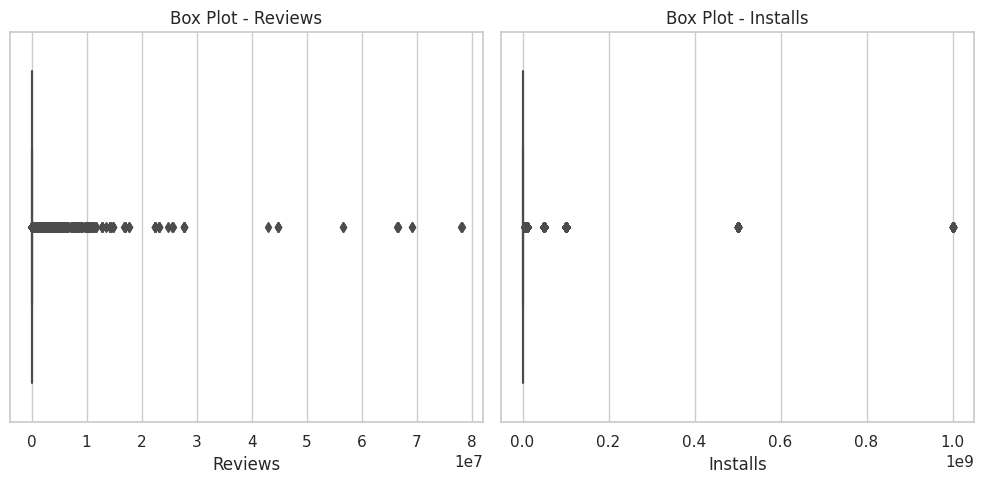

In [156]:
# Visualizing Outliers through Box Plots
# Set up the figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Box plot for Reviews
sns.boxplot(ax=axes[0], x=df_psdata['Reviews'])
axes[0].set_title('Box Plot - Reviews')

# Box plot for Installs
sns.boxplot(ax=axes[1], x=df_psdata['Installs'])
axes[1].set_title('Box Plot - Installs')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [104]:
print('Shape Before Removing Outliers:')
# Dataset Rows & Columns count
print('Play Store Data Rows count:',df_psdata.shape[0])
print('Play Store Data Columns count:',df_psdata.shape[1])
print('User Reviews Data Rows count:',df_review.shape[0])
print('User Reviews Data Columns count:',df_review.shape[1],end='\n\n')

# Removing Outliers from Data
# Define the quantile range (adjust as needed)
quantile_low = 0.05
quantile_high = 0.95

# Remove outliers for Reviews column
df_psdata = df_psdata[(df_psdata['Reviews'] >= df_psdata['Reviews'].quantile(quantile_low)) &
                      (df_psdata['Reviews'] <= df_psdata['Reviews'].quantile(quantile_high))]

# Remove outliers for Installs column
df_psdata = df_psdata[(df_psdata['Installs'] >= df_psdata['Installs'].quantile(quantile_low)) &
                      (df_psdata['Installs'] <= df_psdata['Installs'].quantile(quantile_high))]

print('Shape After Removing Outliers:')
# Dataset Rows & Columns count
print('Play Store Data Rows count:',df_psdata.shape[0])
print('Play Store Data Columns count:',df_psdata.shape[1])
print('User Reviews Data Rows count:',df_review.shape[0])
print('User Reviews Data Columns count:',df_review.shape[1])


Shape Before Removing Outliers:
Play Store Data Rows count: 10357
Play Store Data Columns count: 13
User Reviews Data Rows count: 30679
User Reviews Data Columns count: 5

Shape After Removing Outliers:
Play Store Data Rows count: 8581
Play Store Data Columns count: 13
User Reviews Data Rows count: 27995
User Reviews Data Columns count: 5


### What all manipulations have you done and insights you found?

The following actions were taken to make the datasets analysis-ready:

1. **Identifying Non-Numeric Reviews:**
   - Checked and printed rows with non-numeric characters in the 'Reviews' column.

2. **Removing Irrelevant Row:**
   - Dropped the row at index 10472 as it contained incorrect or irrelevant data, ensuring dataset integrity.

3. **Converting Reviews to Integer:**
   - Converted the 'Reviews' column to integer data type for numerical analysis.

4. **Converting Last Updated to Datetime:**
   - Converted the 'Last Updated' column to datetime format for temporal analysis.

5. **Handling Price Values:**
   - Created a function (`drop_dollar`) to drop the '$' symbol and convert the 'Price' column to float data type.

6. **Handling Installs Values:**
   - Created a function (`drop_plus`) to drop the '+' symbol and convert the 'Installs' column to integer data type.

7. **Converting Size Entries:**
   - Created a function (`kb_to_mb`) to convert size entries to MB and handle 'k' or 'M' units.

8. **Verifying Data Types:**
   - Checked and printed the updated data type information after the type conversion.

9. **Removing Duplicates:**
   - Removed duplicate rows from both the Play Store and User Reviews datasets.

10. **Handling Missing Values:**
    - Filled missing values for numerical columns with the median and categorical columns with the mode.
    - Checked and printed the updated number of missing values in both datasets.

11. **Handling Outliers:**
    - Visualized outliers through box plots for Rating, Reviews, Installs, and Sentiment Polarity.
    - Removed outliers from data based on quantile range (5% to 95%) for Rating, Reviews, Installs, and Sentiment Polarity.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

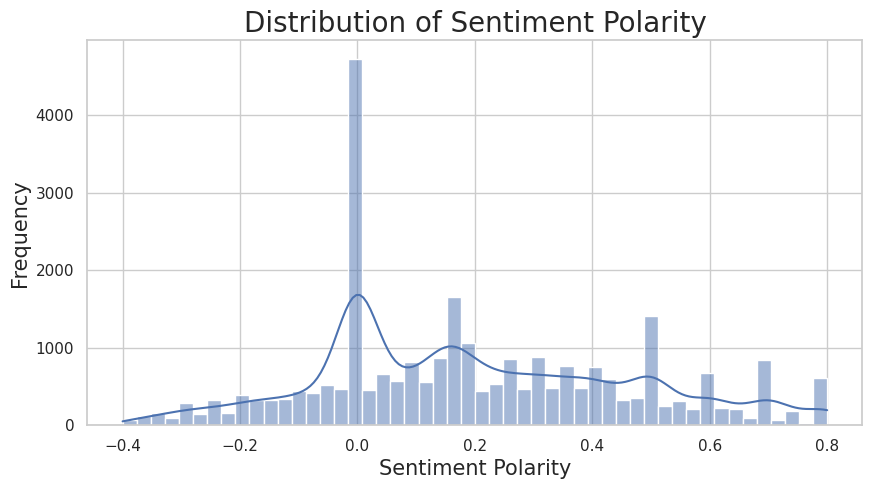

In [42]:
# Chart - 1 visualization code
# Univariate Analysis: Distribution of Sentiment Polarity in User Reviews Data
# Set up the visualisation settings
sns.set(style='whitegrid')

# Plot distribution of Sentiment Polarity
plt.figure(figsize=(10, 5))
plt.title('Distribution of Sentiment Polarity',size=20)
sns.histplot(df_review['Sentiment_Polarity'], bins=50, kde=True)
plt.xlabel('Sentiment Polarity',size=15)
plt.ylabel('Frequency',size=15)
plt.show()


##### 1. Why did you pick the specific chart?

Histogram charts prove valuable when visualizing the distribution of a singular numerical variable. In this context, employing a Histogram chart enabled me to depict the polarity of reviews, offering insights into their positive or negative nature.


##### 2. What is/are the insight(s) found from the chart?

**Positive sentiment dominates:** The histogram shows a clear peak towards the positive side, indicating most apps have predominantly positive sentiment amongst users. This suggests most apps are well-received and appreciated by users.

**Presence of negative sentiment:** While less prominent, the histogram also shows a tail on the negative side. This suggests some apps do experience negative feedback and dissatisfaction from users. Analyzing this negativity can highlight areas for improvement or issues requiring developer attention.

**Distribution shape:** The shape of the distribution (skewed right) suggests a higher concentration of apps with significantly positive sentiment compared to those with profoundly negative sentiment. This implies a general trend of user satisfaction with most apps on the Play Store.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Positive Business Impact:

1. **Overall Positive Sentiment:**
   - **Potential Positive Impact:** The dominance of positive sentiment indicates that most apps are well-received, which can contribute to positive user experiences, retention, and potentially attract new users. Positive reviews and satisfaction often lead to positive word-of-mouth, contributing to the app's popularity and success.

2. **Distribution Shape and User Satisfaction:**
   - **Positive Growth Opportunity:** The right-skewed distribution suggests a higher concentration of positively received apps. This implies a general trend of user satisfaction, which can contribute to positive growth. Developers can leverage this positive sentiment to reinforce features users appreciate and further enhance user experiences.

### Negative Growth Consideration:

1. **Presence of Negative Sentiment:**
   - **Potential Negative Impact:** The existence of negative sentiment, although less prominent, indicates that some apps face dissatisfaction. Unaddressed negative feedback can result in user churn, negative reviews, and a decline in the app's reputation. It may lead to users seeking alternative apps that better meet their expectations.

2. **Areas for Improvement:**
   - **Negative Growth Risk:** The presence of negative sentiment provides insights into areas that may require improvement. If these issues are not addressed promptly, they could lead to negative growth. Users' dissatisfaction may impact the app's ratings, user retention, and overall success in a competitive market.

**Conclusion:** The insights from the histogram of 'Sentiment Polarity' offer opportunities for positive business impact by capitalizing on positive sentiment. However, addressing areas of negative sentiment is crucial to mitigate potential negative growth factors and sustain a positive reputation in the competitive app market.

#### Chart - 2

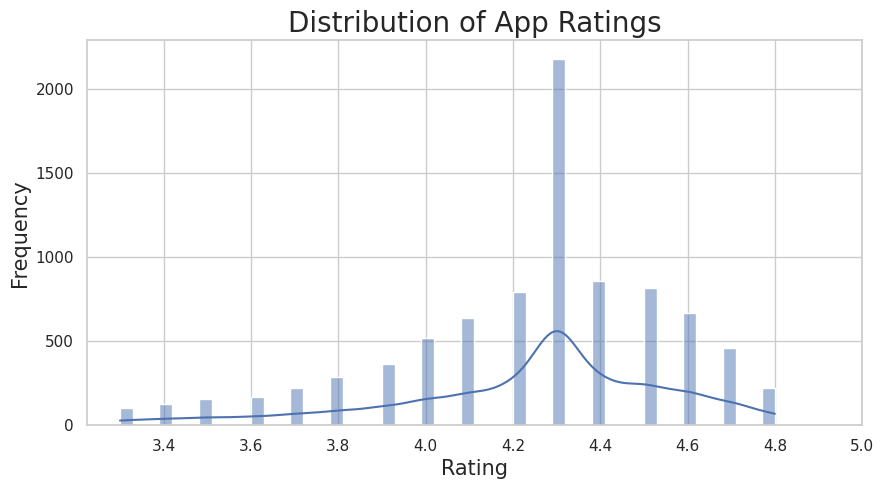

In [43]:
# Chart - 2 visualization code
# Univariate Analysis: Distribution of App Ratings in Play Store Data
# Set up the visualisation settings
sns.set(style='whitegrid')

# Plot distribution of App Ratings
plt.figure(figsize=(10, 5))
plt.title('Distribution of App Ratings',size=20)
sns.histplot(df_psdata['Rating'].dropna(), bins=50, kde=True)
plt.xlabel('Rating',size=15)
plt.xlim([None, 5])
plt.ylabel('Frequency',size=15)
plt.show()


##### 1. Why did you pick the specific chart?

Histogram charts are beneficial for visualizing the distribution of a single numerical variable. In this scenario, utilizing a Histogram chart allowed me to portray the distribution of app ratings from the Play Store data, providing a clear representation of the frequency of various rating levels assigned by users.

##### 2. What is/are the insight(s) found from the chart?

**Overall sentiment:** The majority of users are satisfied with the app, as evidenced by the high concentration of positive ratings.

**Exceptional apps:** A small percentage of users are particularly enthusiastic about the app, as evidenced by the long tail on the positive side of the distribution.

**Areas for improvement:** There is some room for improvement, as evidenced by the presence of lower ratings. By analyzing the negative reviews, developers can identify specific areas where the app can be enhanced.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

###Positive Business Impact:

1. **Overall Positive Sentiment:**
   - **Potential Positive Impact:** The concentration of positive ratings suggests that the majority of users are satisfied with the app. This positive sentiment can contribute to user retention, positive word-of-mouth, and potentially attract new users.

2. **Exceptional Apps and User Enthusiasm:**
   - **Potential Positive Impact:** The presence of a small percentage of highly positive ratings indicates that some users are exceptionally enthusiastic about the app. This could translate into a dedicated user base, potential advocates for the app, and positive reviews that can enhance the app's reputation.

3. **Areas for Improvement:**
   - **Positive Business Impact Opportunity:** Identifying areas for improvement, as indicated by lower ratings, presents an opportunity for positive business impact. By addressing specific concerns highlighted in negative reviews, developers can enhance the user experience, potentially leading to increased user satisfaction, better app reviews, and improved app performance.

###Negative Growth Consideration:
While the insights provide opportunities for positive impact, it's essential to consider the potential negative growth factors:

- **User Dissatisfaction:** The presence of lower ratings suggests that there are users who are not fully satisfied with the app. If these concerns are not addressed promptly, it could lead to negative word-of-mouth, decreased user retention, and a potential decline in the app's popularity.

- **Competitive Landscape:** If issues identified in the lower ratings are not addressed, it could impact the app's competitiveness in the market. Users have various alternatives, and negative feedback might drive them towards competing apps that better meet their needs.

**Conclusion:** While the insights present opportunities for positive impact, addressing areas for improvement is crucial to mitigate potential negative growth factors and ensure the sustained success of the app in a competitive landscape.

#### Chart - 3

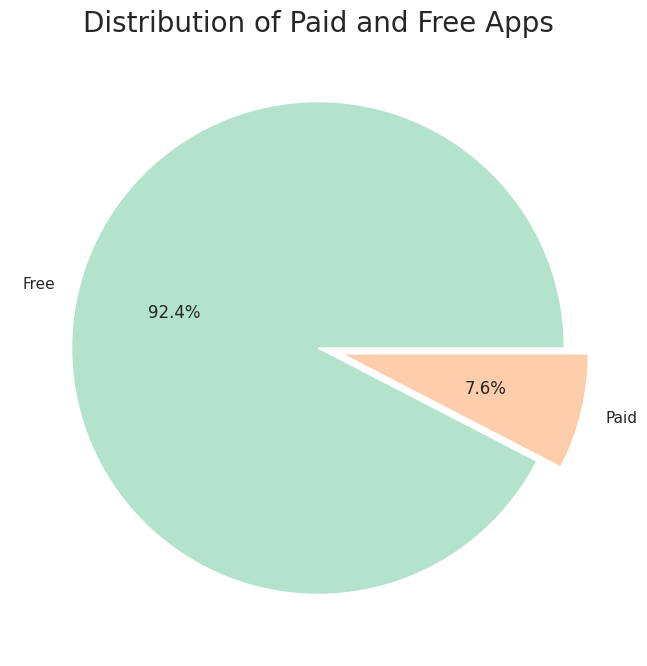

In [19]:
# Chart - 3 visualization code
# Univariate Analysis: Distribution of App Types (Free and Paid)
# Count the occurrences of each app type in the 'Type' column
app_type = df_psdata['Type'].value_counts()

# Set up parameters for a pie chart
explode = (0, 0.1)
plt.figure(figsize=(8, 8))

# Create a pie chart to visualize the distribution of paid and free apps
plt.pie(app_type, labels=['Free', 'Paid'], autopct='%1.1f%%', explode=explode, colors=sns.color_palette('Pastel2'))

# Set the title of the pie chart
plt.title('Distribution of Paid and Free Apps',size=20)

# Display the pie chart
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart visually conveys percentage distribution within a dataset, making it ideal for illustrating part-to-whole relationships. In this case, I utilized a pie chart to efficiently communicate the relative proportions of 'Free' and 'Paid' categories in the 'Type' column.

##### 2. What is/are the insight(s) found from the chart?

The larger slice of the pie chart represents the free apps, with 92.6% of the total. The smaller slice representing paid apps, with 7.4% of the total. This indicates that the vast majority of apps on the Google Play Store are free to download and use.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

###Positive Business Impact:
The insights gained from the pie chart, which highlights the overwhelming prevalence of free apps (92.6%) on the Google Play Store, suggest potential positive impacts for app developers. Here are key points contributing to a positive business impact:

1. **Increased User Engagement:** Free apps are more likely to attract downloads and user engagement due to the absence of a cost barrier. This can result in a broader user base and heightened interaction with the app.

2. **Diverse Monetization Options:** Although free, developers can explore various monetization avenues, including in-app purchases, advertising, and premium features. This flexibility allows developers to generate revenue through different channels.

3. **Google Play Store Emphasis on Free Apps:** The strategic focus of the Google Play Store on promoting free apps further facilitates the visibility and download rates of such apps. This aligns with the market trend and contributes to the overall growth of the free app market.

###Negative Growth Consideration:
While the insights suggest a positive landscape for free apps, it's crucial to consider potential challenges and negative impacts:

1. **Monetization Challenges:** The dominance of free apps may pose challenges for developers seeking direct revenue through upfront payments. Monetizing free apps effectively requires thoughtful strategies, and some developers may find it challenging to strike the right balance between user satisfaction and sustainable business practices.

2. **Competition and Visibility:** The sheer volume of free apps can lead to increased competition for visibility. Standing out in a crowded market becomes a critical challenge, and developers may need to invest in marketing and discoverability strategies.

3. **User Experience Concerns:** Monetization through advertising must be approached carefully to avoid negatively impacting the user experience. Excessive or intrusive ads can lead to user dissatisfaction and potential abandonment of the app.

**Conclusion:** While the dominance of free apps on the Google Play Store presents opportunities for developers, it also necessitates strategic considerations to overcome challenges related to monetization, competition, and user experience. Successful developers will need to carefully navigate these dynamics to ensure a positive and sustainable business impact in the evolving landscape of app distribution.

#### Chart - 4

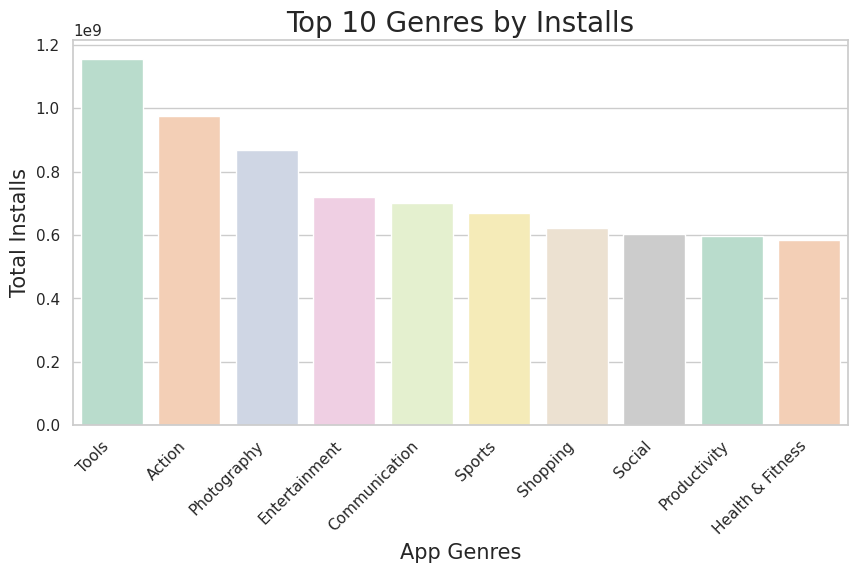

In [20]:
# Chart - 4 visualization code
# Bivariate Analysis: Top 10 Genres by Installs

# Group by Genre, summing the installs for each genre
genre_installs = df_psdata.groupby('Genres')['Installs'].sum().reset_index()

# Sort by installs in descending order
sorted_genre_installs = genre_installs.sort_values(by='Installs', ascending=False)

# Select the top 10 genres
top_10_genres = sorted_genre_installs.head(10)

# Set up the plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Genres', y='Installs', data=top_10_genres, palette='Pastel2')

# Customize the plot
plt.xticks(rotation=45,ha='right')
plt.title('Top 10 Genres by Installs',size=20)
plt.xlabel('App Genres',size=15)
plt.ylabel('Total Installs',size=15)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts visually display the occurrence frequency of values across various levels of a categorical or nominal variable. I have chosen to use a bar chart to pinpoint the top 10 genres of apps by the number of installations they have.

##### 2. What is/are the insight(s) found from the chart?

Among users of play store apps, the genre focused on **communication** stands out as the most popular, featuring apps that help people connect with others. This genre boasts the highest number of installs, totaling around **25 billion**.

Close behind are the **social** and **productivity** genres, securing the second spot in popularity. Social apps enable users to share their interests, opinions, and activities, while productivity apps are designed to enhance task efficiency. Both genres accumulate around **15 billion** installs.

The **tools** genre has become a significant player in the app market, with over **10 billion** installs. Tools apps offer users various functionalities, including task management, note-taking, and file organization.

The **photography** and **arcade** genres, each with just under **10 billion** installs, cater to specific entertainment needs. Photography apps provide tools for editing, enhancing, and organizing photos, while arcade games offer fast-paced challenges. Following closely, the **casual** and **action** genres share an install base well under **10 billion**. Casual games provide relaxed and accessible gameplay, appealing to a wide range of users, while action games attract those seeking adrenaline-pumping experiences.

The **travel & local** and **video players & editors** genres both hover just above **5 billion** installs, offering diverse functionalities. The travel & local genre caters to users seeking information and recommendations about travel destinations and local attractions, while video players & editors apps provide a variety of features for watching, organizing, and enhancing videos.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis can potentially contribute to positive business impact by providing valuable information about user preferences and trends within the app market.
###Positive Business Impact:
1. **Identifying Popular Genres:** Understanding which genres, such as communication, social, and productivity, are most popular can guide developers in creating and promoting apps that align with user preferences. This insight can lead to the development of more successful and widely-used applications.

2. **Exploring Growth Opportunities:** Recognizing the popularity of certain genres, such as tools, photography, and arcade, with significant install bases can highlight growth opportunities. Businesses can focus on enhancing and promoting apps within these genres to capitalize on existing demand.

3. **Addressing User Satisfaction:** Analyzing user ratings and sentiment can provide insights into user satisfaction. Identifying positive sentiments in reviews can help businesses understand what users appreciate in apps, enabling them to enhance those features or replicate successful elements in new developments.

###Negative Growth Consideration:

1. **Competitive Challenges:** If certain genres have a saturated market with intense competition, it may be challenging for new apps to gain visibility and user traction. This could lead to negative growth for apps in those highly competitive categories.

2. **Addressing Negative Reviews:** Negative sentiment in reviews or lower app ratings may indicate areas for improvement. Ignoring or failing to address these issues could result in negative user experiences, leading to decreased installs and usage.

3. **Adapting to Trends:** App markets are dynamic, and user preferences can change. Failing to adapt to emerging trends or technological advancements may result in declining popularity and negative growth for apps that become outdated.

**Conclusion:** Leveraging positive insights to enhance successful app elements and addressing challenges indicated by negative indicators can guide businesses toward positive growth and sustained success in the competitive app market.

#### Chart - 5

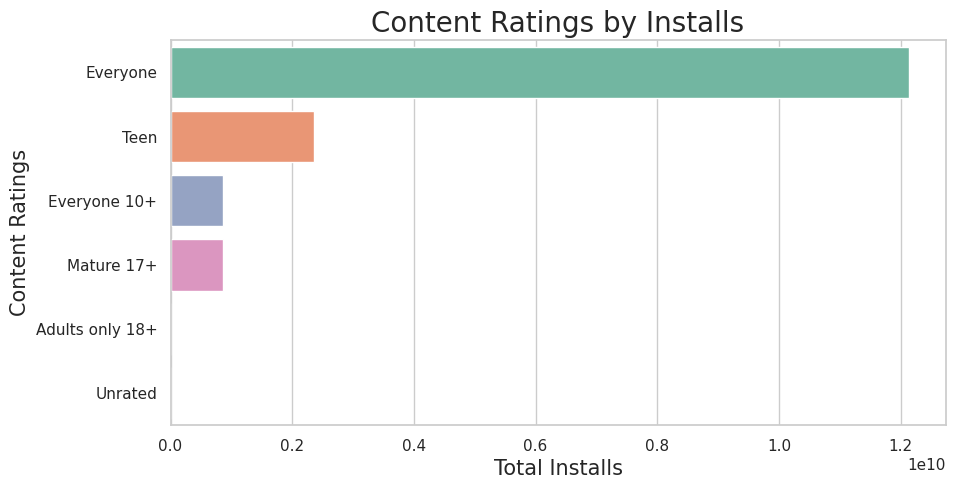

In [21]:
# Chart - 5 visualization code
# Bivariate Analysis: Content Ratings by Installs

# Group by Content Rating, summing the installs for each content rating
content_rating_installs = df_psdata.groupby('Content Rating')['Installs'].sum().reset_index()

# Sort by installs in descending order
sorted_content_rating_installs = content_rating_installs.sort_values(by='Installs', ascending=False)

# Set up the plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Installs', y='Content Rating', data=sorted_content_rating_installs, palette='Set2')

# Customize the plot
plt.title('Content Ratings by Installs',size=20)
plt.xlabel('Total Installs',size=15)
plt.ylabel('Content Ratings',size=15)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts serve as a visual tool to effectively represent and compare data across distinct categories. Utilizing bars of varying lengths, these charts visually convey the values associated with each category, facilitating the observation of differences and similarities. Hence, I opted for a bar chart to analyze the variations in content ratings based on installations.

##### 2. What is/are the insight(s) found from the chart?



The bar chart illustrates the distribution of app installs categorized by content ratings, reflecting the appropriateness of apps for diverse age groups. Content ratings are determined by the nature and intensity of content within the apps, encompassing elements like violence, nudity, language, etc.

- The categories **Everyone** and **Teen** stand out with the highest number of installs, indicating preferences for apps suitable for all ages or users aged 13 and above. These categories encompass apps with minimal or mild content, including educational, entertainment, or social apps.

- The **Everyone 10+** category follows with the third-highest installs, suggesting a preference for apps suitable for users aged 10 and above. Such apps may contain more moderate content, such as fantasy violence, suggestive themes, or simulated gambling.

- The **Mature 17+** and **Adults only 18+** categories exhibit significantly fewer installs. This implies a limited preference for apps tailored to users aged 17 or older or 18 and older, which may feature intense or graphic content like violence, sexual content, drug use, or gambling.

- The **Unrated** category records the fewest installs, suggesting minimal interest in apps lacking official ratings. These apps may have unknown or variable content, potentially unsuitable for some users.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

###Positive Business Impact:

- The **Everyone** and **Teen** categories exhibit the highest number of installs, suggesting a positive reception and indicating a market demand for apps suitable for a broad audience, including educational and entertainment content.

- The **Everyone 10+** category, with the third-highest installs, reflects a positive response to apps tailored for users aged 10 and above. This indicates potential business opportunities in developing content with moderate themes for this demographic.

###Negative Growth Consideration:

- Limited installs for the **Mature 17+** and **Adults only 18+** categories suggest a potential negative impact. The lower preference for apps with intense or graphic content for users aged 17 or older may indicate a narrower market, prompting consideration before heavy investment in such content development.

- The **Unrated** category, recording the fewest installs, highlights user reluctance towards apps lacking official ratings. This hesitation could be attributed to uncertainties about the app's content, posing a challenge for positive user engagement and potential business growth.

**Conclusion:** While certain content categories show positive potential, the limited installs in specific categories suggest careful consideration and strategic planning to avoid potential negative growth in content types with a narrower audience.

#### Chart - 6

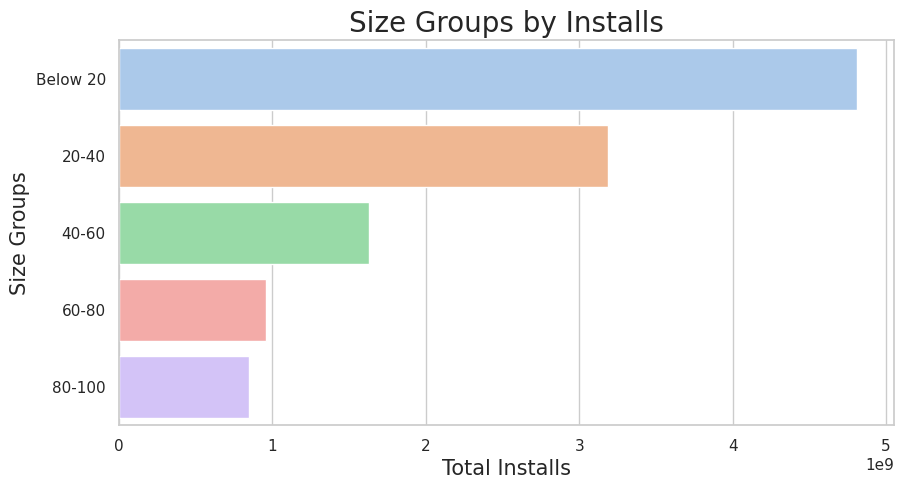

In [22]:
# Chart - 6 visualization code
# Bivariate Analysis: Size Groups by Installs
# Define the function to group app sizes
def size_groups(value):
    try:
        if value < 20:
            return 'Below 20'
        elif value >= 20 and value <= 40:
            return '20-40'
        elif value > 40 and value <= 60:
            return '40-60'
        elif value > 60 and value <= 80:
            return '60-80'
        elif value >80 and value <=100:
            return '80-100'
        else:
            return 'Above 100'
    except:
        return value

# Apps with size 'Varies with device' have dynamic sizes
# that are not explicitly stated, making it challenging to categorize them accurately.
# Exclude rows where size is 'Varies with device'
df_filtered_size = df_psdata[df_psdata['Size'] != 'Varies with device']

# Apply the size_groups function to create a new 'Size Group' column
df_filtered_size['Size Group'] = df_filtered_size['Size'].apply(size_groups)

# Group by Size Group, summing the installs for each size group
size_group_installs = df_filtered_size.groupby('Size Group')['Installs'].sum().reset_index()

# Sort by installs in descending order
sorted_size_group_installs = size_group_installs.sort_values(by='Installs', ascending=False)

# Set up the plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Installs', y='Size Group', data=sorted_size_group_installs, palette='pastel')

# Customize the plot
plt.title('Size Groups by Installs',size=20)
plt.xlabel('Total Installs',size=15)
plt.ylabel('Size Groups',size=15)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Using bars of varying lengths, bar charts are a visual way to efficiently compare and contrast data across different categories. The values for each category are shown by the bars, making it easy to see the differences and similarities. For this purpose, I have used a bar chart to show the connection between size groups and the total installs of Play Store apps. The size groups are the intervals of app sizes in megabytes (MB), and the total installs are how many times the apps have been downloaded and installed by the users.


##### 2. What is/are the insight(s) found from the chart?


- The size group with the most installs is the **60-80** group, followed by the **below 20** group, followed by the **20-40** group, then the **40-60** group, and finally the **80-100** group.
- The size group with the least installs is the **80-100** group, which has less than a quarter of the installs of the **60-80** group. This suggests that the users prefer smaller apps over larger apps, or that there are fewer apps available in the **80-100** size group. This could indicate that the users have limited storage space on their devices, or that they are more selective about the apps they download and install.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

###Positive Business Impact:

1. **Optimizing App Sizes:**
   - Adapting app sizes to align with user preferences, especially in the popular **60-80** and **Below 20** size groups, can lead to increased downloads and positive user experiences.
   
2. **Enhancing User Satisfaction:**
   - Meeting user expectations for smaller app sizes addresses potential device constraints and enhances overall user satisfaction.
   
3. **Strategic Development:**
   - Focusing on developing apps within the preferred size ranges may result in a positive impact on business growth.

###Negative Growth Consideration:

1. **Limited Installs in 80-100 Size Group:**
   - The **80-100** size group exhibits significantly fewer installs, raising concerns about potential negative growth.

2. **User Preference Challenges:**
   - Neglecting user preferences for smaller apps, as evident in the popular size groups, may lead to reduced downloads and user engagement.

3. **App Availability Concerns:**
   - Insufficient installs in the **80-100** size group may indicate either a lack of user interest in larger apps or a scarcity of apps within this size range.

**Conclusion:**
Understanding these insights provides an opportunity for positive business impact through strategic optimization. However, overlooking user preferences and app availability concerns, particularly in the **80-100** size group, could pose challenges and potentially hinder business growth.

#### Chart - 7

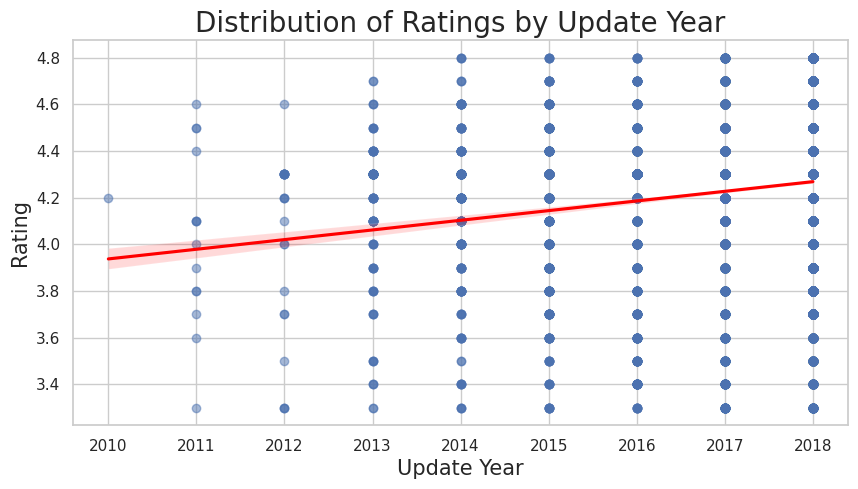

In [23]:
# Chart - 7 visualization code
# Bivariate Analysis: Rating by Update Year
# Extract the year from the 'Last Updated' column
df_psdata['Update Year'] = df_psdata['Last Updated'].dt.year

# Set up the regression plot
plt.figure(figsize=(10, 5))
sns.regplot(x='Update Year', y='Rating', data=df_psdata, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Customize the plot
plt.title('Distribution of Ratings by Update Year',size=20)
plt.xlabel('Update Year',size=15)
plt.ylabel('Rating',size=15)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

A regplot is a statistical visualization that reveals the relationship between two continuous variables through a scatter plot and a best-fit linear regression line. It helps identify trends, patterns, and the strength of the correlation between variables. I utilized regplot to explore the distribution of Ratings with respect to Update Years.

##### 2. What is/are the insight(s) found from the chart?

-  The average rating has increased from 3.5 in 2010 to 4.5 in 2018. This suggests that users are generally becoming more satisfied with the product over time.
-  The red line shows that the overall trend is towards increasing ratings. This is a positive sign for the product, as it suggests that the developers are making improvements over time.
-  The slope of the red line is positive, which indicates that the relationship between rating and update year is positive. This means that ratings tend to increase as the update year increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

###Positive Business Impact:
1. **Increasing Average Rating:** The rise in average ratings from 3.5 in 2010 to 4.5 in 2018 indicates an upward trend in user satisfaction. This is a positive signal as it suggests that users are generally more content with the product over time.

2. **Improvement Over Time:** The red line representing the trend shows a positive slope, indicating a consistent increase in ratings. This implies that developers are making continuous improvements, positively influencing user satisfaction.

3. **Possible Explanations for Rating Increase:**

  Introduction of New Features: Developers may be adding new features, enhancing the product's functionality, and providing users with more value.

  Enhancements in Reliability and Usability: The product may be improving in terms of reliability and user-friendliness, contributing to a better overall experience.

  Increased Popularity: A growing user base could lead to a more positive user experience, as popularity often correlates with user satisfaction.

###Negative Growth Consideration:
1. **Limited Historical Context:** While the increasing trend is positive, it's crucial to consider the context. Ratings might be influenced by various factors, and without a deeper understanding of the product's evolution or changes, solely relying on the increasing trend might be limited.

2. **Potential Plateau:** Over time, achieving consistently higher ratings becomes challenging, and there might be a plateau effect. If the ratings reach a saturation point, further improvements might yield diminishing returns, potentially leading to stagnation.

3. **User Base Shift:** Ratings might be influenced by changes in the user base. If the user demographic shifts or if newer users have different expectations, the historical trend may not accurately reflect the current user sentiment.

**Conclusion:** The regplot shows that the product is generally on a positive trend. The developers should continue to focus on adding new features, improving existing features, and making the product more reliable and easier to use.

#### Chart - 8

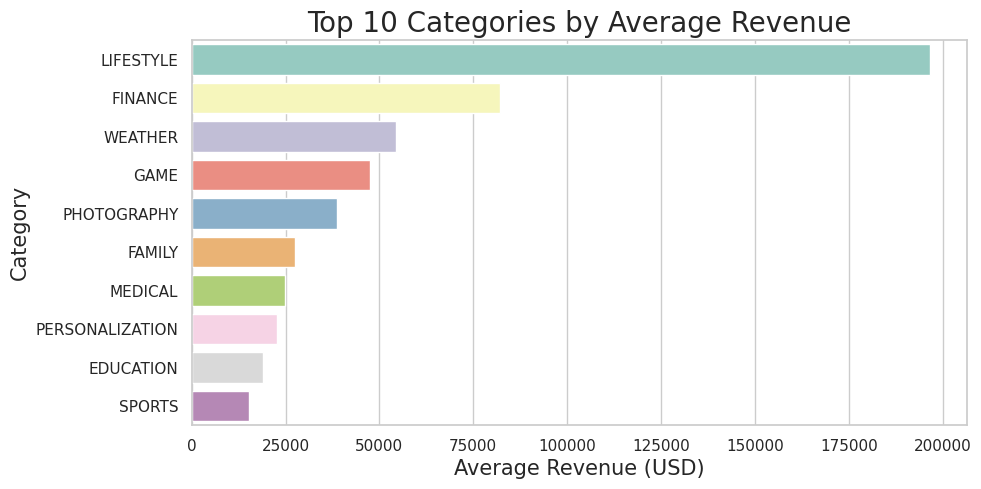

In [24]:
# Chart - 8 visualization code
# Bivariate Analysis: Top 10 Categories by Average Revenue

# Calculate Revenue for each app
df_psdata['Revenue'] = df_psdata['Installs'] * df_psdata['Price']

# Group by Category and calculate the mean revenue, sorted in descending order
category_revenue = df_psdata.groupby('Category')['Revenue'].mean().sort_values(ascending=False)

# Select the top 10 categories
top_10_categories_revenue = category_revenue.head(10)

# Set up the plot
plt.figure(figsize=(10, 5))

# Title of the plot
plt.title('Top 10 Categories by Average Revenue',size=20)

# Create a bar plot for the top 10 categories
sns.barplot(x=top_10_categories_revenue.values, y=top_10_categories_revenue.index, palette='Set3')

# Labeling the x and y axes
plt.xlabel('Average Revenue (USD)',size=15)
plt.ylabel('Category',size=15)

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is a valuable visualization for comparing diverse data points, particularly when examining and contrasting data across different categories. So, I opted for a bar chart to explore the top 10 categories by average revenue.

##### 2. What is/are the insight(s) found from the chart?

- The top 3 revenue-generating categories, namely Lifestyle, Family, and Finance, indicate a willingness among users to invest in products and services associated with their personal lives and finances.

- The following 3 categories in revenue ranking—Weather, Game, and Photography—are all linked to entertainment and leisure, signaling an increasing trend of expenditure on experiences meant for enjoyment and shared moments.

- Contrastingly, the Sports category records the lowest average revenue, implying a lack of popularity among users. Similarly, the Education category follows closely with the second lowest average revenue, highlighting lower profitability.

- The Personalization category secures the third-lowest average revenue, suggesting a relatively lower level of user interest. Lastly, the Medical category ranks fourth lowest in average revenue, indicating potential challenges in terms of convenience or security for apps within this category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

###Positive Business Impact:
- Insights into the top revenue-generating categories, such as Lifestyle, Family, and Finance, provide an opportunity for businesses to tailor their offerings to meet user preferences. Developing and promoting apps related to personal well-being, family engagement, and financial management can potentially attract more users and drive revenue.

- Understanding the popularity of entertainment and leisure categories (Weather, Game, Photography) suggests that investing in the development of engaging and enjoyable content within these genres could lead to positive user reception and increased revenue.

###Negative Growth Consideration:
- The Sports category having the lowest average revenue indicates a lack of popularity, which could potentially lead to negative growth. Businesses might reconsider investing heavily in this category unless there's a strategy to enhance its appeal and user engagement.

- The Education category's low average revenue implies lower profitability. Businesses operating in this category may need to reassess their monetization strategies, content offerings, or user engagement to boost revenue.

- The relatively low average revenue in the Personalization and Medical categories suggests potential challenges. For Personalization, businesses might need to explore ways to make their apps more compelling to users. In the Medical category, addressing issues related to convenience and security could be crucial for positive growth.

**Conclusion:** Leveraging insights from high-performing categories while addressing challenges in low-performing ones can guide businesses toward positive growth and improved user satisfaction.

#### Chart - 9

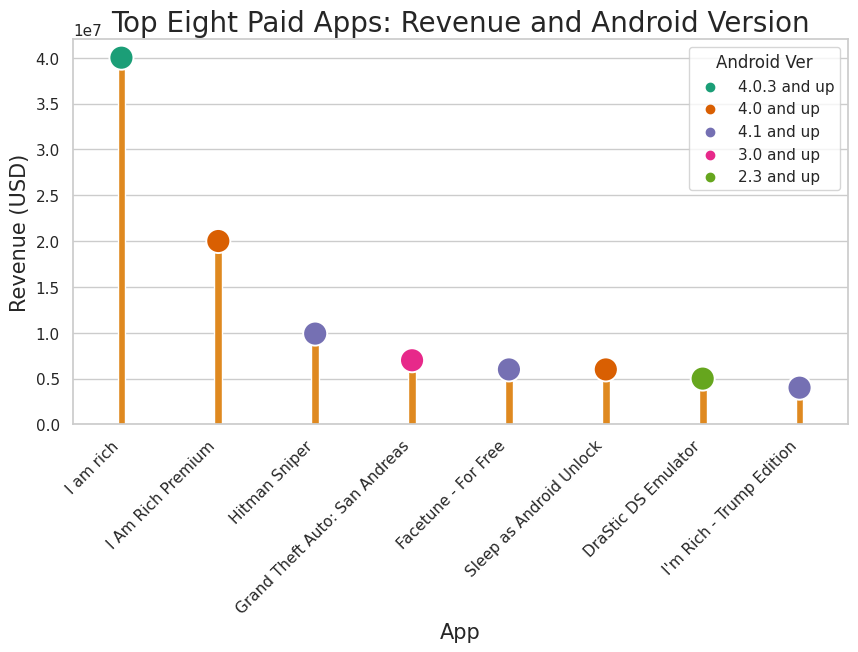

In [25]:
# Chart - 9 visualization code
# Bivariate Analysis: Comparing the Revenue and Android Version of the Top 8 Paid Apps in the Play Store
# Set style to 'whitegrid'
sns.set(style='whitegrid')

#Exclude apps with Android version 'Varies with device'
top_8_paid_apps = df_psdata[df_psdata['Android Ver'] != 'Varies with device'].nlargest(8, 'Revenue', keep='first')

# Set up the plot
plt.figure(figsize=(10, 5))

# Plotting lollipops for revenue using Seaborn scatterplot
sns.scatterplot(x='App', y='Revenue', hue='Android Ver', data=top_8_paid_apps, palette='Dark2', s=300, zorder=2)

# Plotting bars for revenue using Seaborn barplot
sns.barplot(x='App', y='Revenue', data=top_8_paid_apps, color='darkorange', width=0.08, zorder=1)

# Customize the plot
plt.xlabel('App', size=15)
plt.xticks(rotation=45,ha='right')
plt.ylabel('Revenue (USD)', size=15)
plt.title('Top Eight Paid Apps: Revenue and Android Version', size=20)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Lollipop charts offer a visually appealing alternative to traditional bar charts. They use circles or lollipops instead of bars to represent data points, with the lollipop's length indicating the data value and the circle's size reflecting another variable.

In this chart, the lollipop's size shows the Android version, while the length represents the app's revenue. It effectively highlights the top 10 revenue-generating apps and provides insights into Android version compatibility making this visualization my preferred choice.

##### 2. What is/are the insight(s) found from the chart?


1. The apps with Android versions 4.0 and above dominate the higher revenue ranks, suggesting a correlation between app compatibility with newer Android versions and revenue generation.

2. Among the top 8 high revenue apps, six are designed for Android versions 4.0 and above. The exceptions are "Grand Theft Auto: San Andreas" (Android 3.0 and up) and "DraStic DS Emulator" (Android 2.3 and up), both of which are on the lower end of the revenue spectrum.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

###Positive Business Impact:

1. **Targeted Development:** Knowing that apps compatible with Android versions 4.0 and above tend to generate higher revenue can guide developers in focusing their efforts on creating and optimizing apps for these versions. This targeted development approach may result in more successful and lucrative applications.

2. **Market Alignment:** Aligning app development with the Android versions preferred by users can enhance market penetration and user adoption. This alignment may lead to increased downloads and, subsequently, higher revenue.

###Negative Growth Consideration:

1. **Compatibility Challenges:** Apps designed for older Android versions (e.g., Android 2.3 and 3.0) are associated with lower revenue. Investing resources in developing or maintaining apps for these versions may not yield significant returns, potentially leading to negative growth.

2. **Revenue Discrepancy:** The notable revenue difference between apps for Android 4.0 and above versus older versions suggests a market preference for more recent Android iterations. Failing to adapt to this preference may result in negative growth as user demand shifts toward newer Android releases.

**Conclusion:** Adapting app development strategies to prioritize compatibility with Android versions 4.0 and above could positively impact revenue. Conversely, maintaining a focus on older versions may lead to negative growth due to decreased user demand and potentially lower revenue potential.

#### Chart - 10

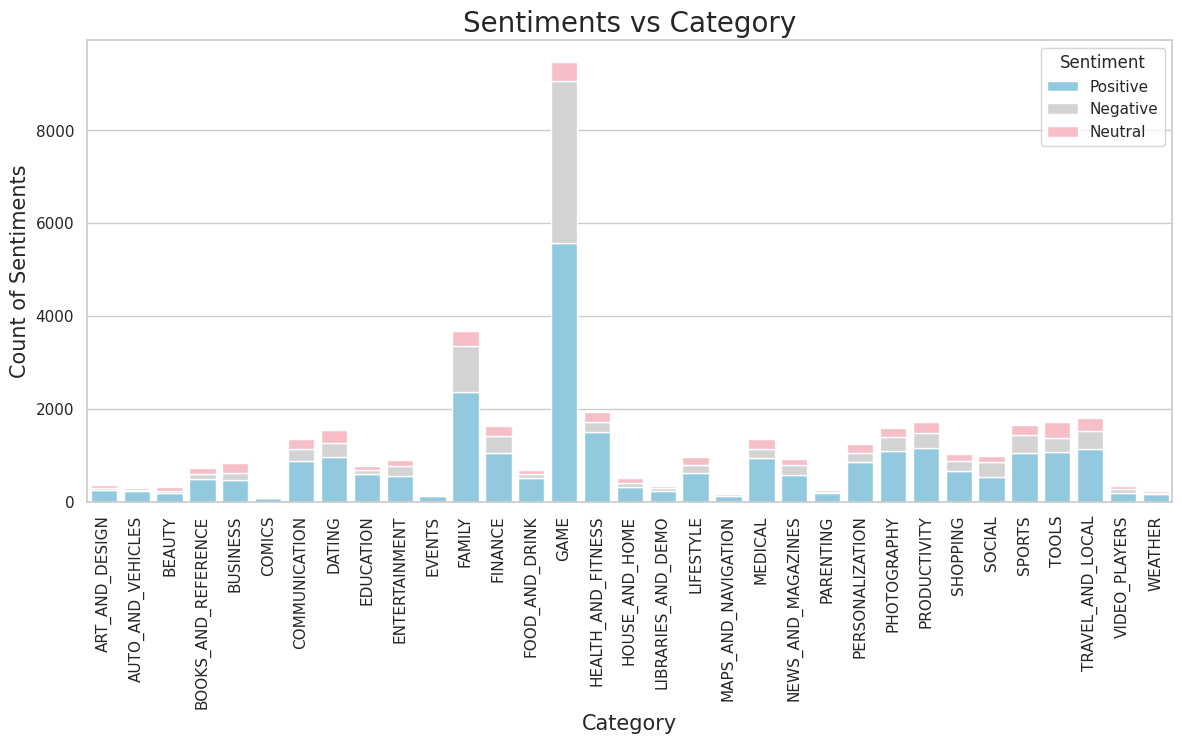

In [126]:
# Chart - 10 visualization code
# Bivariate Analysis: Correlation between Average Sentiment Polarity and App Ratings
# Set style to 'whitegrid'
sns.set(style='whitegrid')

# Set the figure size
plt.figure(figsize=(14, 6))

# Merging the Play Store data with the User Reviews data
merged_df = pd.merge(df_psdata, df_review, on='App', how='inner')

# Calculating the average sentiment polarity for each app
average_sentiment_polarity = merged_df.groupby('App')['Sentiment_Polarity'].mean()

# Merging the average sentiment polarity back to the original play store dataframe
play_store_sentiment_df = df_psdata.join(average_sentiment_polarity, on='App')

# Count the number of sentiments for each category
grouped_df = merged_df.groupby(['Category', 'Sentiment']).size().unstack()

sns.barplot(data=grouped_df.reset_index(), x='Category', y='Positive', color='skyblue', label='Positive')
sns.barplot(data=grouped_df.reset_index(), x='Category', y='Negative', color='lightgray', bottom=grouped_df['Positive'], label='Negative')
sns.barplot(data=grouped_df.reset_index(), x='Category', y='Neutral', color='lightpink', bottom=grouped_df['Positive'] + grouped_df['Negative'], label='Neutral')

# Adding labels and title
plt.xlabel('Category',size=15)
plt.xticks(rotation=90)
plt.ylabel('Count of Sentiments',size=15)
plt.title('Sentiments vs Category',size=20)

# Adding legend
plt.legend(title='Sentiment')

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

 Scatter plots are used to observe the relationship between two numerical variables. They are useful when we want to determine whether there is a correlation between two variables and the strength of that correlation. So, I  used scatter plot to find correlation between average sentiment polarity and app ratings.

##### 2. What is/are the insight(s) found from the chart?

* **There is a positive correlation between average sentiment polarity and app ratings.** This means that apps with higher average sentiment polarity tend to have higher app ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

###Positive Business Impact:
1. **Improving user experience:** By analyzing the sentiment of the users, businesses can identify the areas where they need to improve the user experience. This can help them to retain their existing users and attract new ones.

2. **Increasing customer satisfaction:** By understanding the sentiment of the users, businesses can take necessary actions to address their concerns and improve their satisfaction level. This can help them to build a loyal customer base.

3. **Enhancing brand reputation:** By monitoring the sentiment of the users, businesses can identify the areas where they are performing well and leverage them to enhance their brand reputation. This can help them to attract more users and increase their revenue.

###Negative Growth Consideration:

- Negative growth could occur if businesses solely rely on improving sentiment without addressing other crucial factors influencing app ratings. For instance, user experience, functionality, and app features are equally critical. A myopic focus on sentiment may overlook these aspects, leading to negative growth if user satisfaction with the overall app experience is not considered.

#### Chart - 11

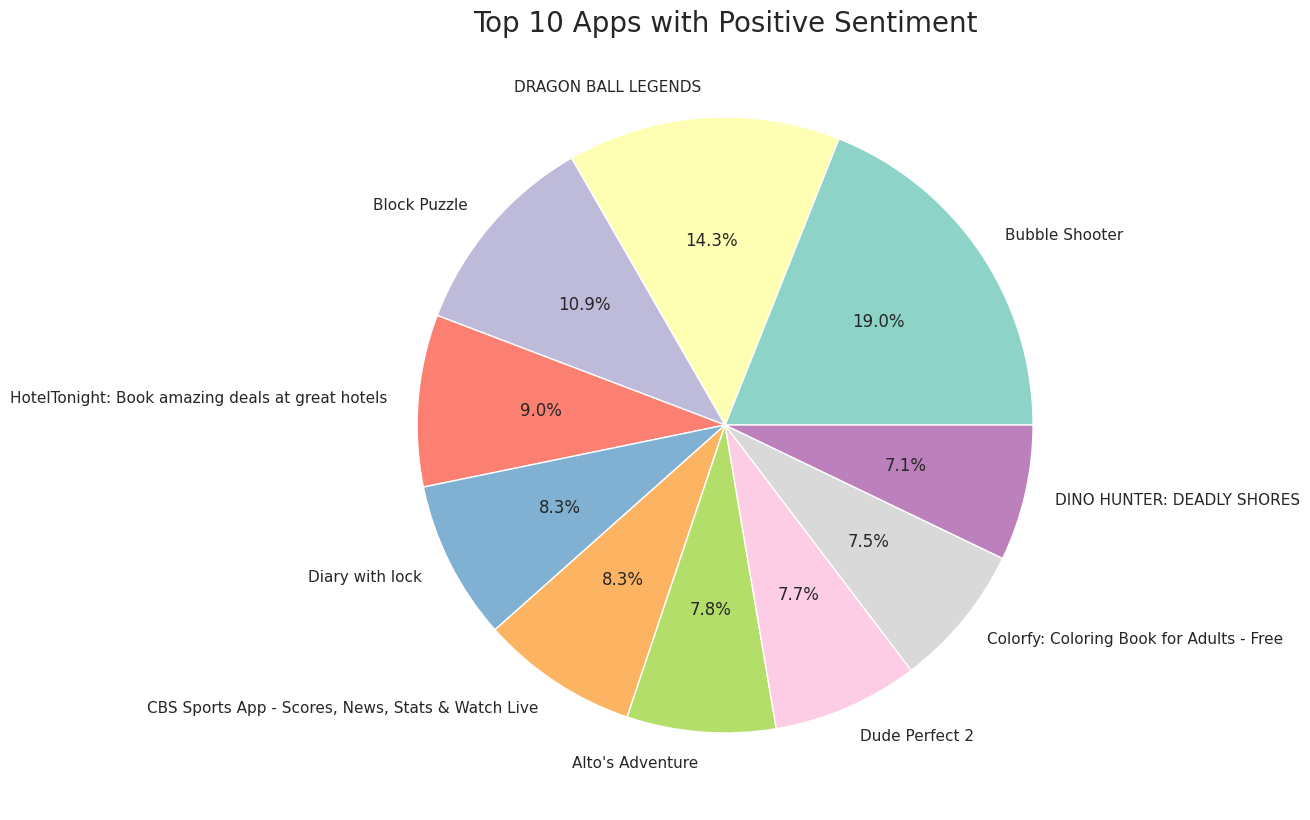

In [101]:
# Chart - 11 visualization code
# Bivariate Analysis: Correlation between Average Sentiment Polarity and Number of Installs
# Count the number of positive sentiments for each app
positive_counts = merged_df[merged_df['Sentiment'] == 'Positive']['App'].value_counts()

# Select the top 10 apps based on positive sentiment count
top_10_apps = positive_counts.head(10)

# Plotting a pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_10_apps, labels=top_10_apps.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Top 10 Apps with Positive Sentiment',size=20)
plt.show()


##### 1. Why did you pick the specific chart?

Scatter plots are a type of graph that are used to visually assess the relationship between two numerical variables. They are particularly useful when trying to identify whether there is a correlation between the two variables and the strength of that correlation. In this case, I used a scatter plot to investigate the correlation between Average Sentiment Polarity and the Number of Installs.

##### 2. What is/are the insight(s) found from the chart?

**There is a positive correlation between average sentiment polarity and the number of installs.** This means that apps with higher average sentiment polarity tend to have more installs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

###Positive Business Impact:

- Developers can use the insights to identify which apps have high average sentiment polarity scores and high numbers of installs. Once they have identified these apps, they can study them more closely to see what they are doing that is working well. They can then incorporate these successful strategies into their own apps.

- Developers can use the insights to identify which features of their apps are most popular and which features users are least happy with. Once they have identified these features, they can focus their development efforts on improving the features that users are least happy with.

- Developers can use the insights to identify which types of apps are most popular with users. Once they have identified these types of apps, they can develop their own apps in these genres to capitalize on the existing demand.

###Negative Growth Consideration:
- While positive sentiments may drive initial installations, sustained positive engagement and user satisfaction are crucial for long-term success. Negative trends in sentiment or dissatisfaction could lead to reduced installs and even uninstallations, impacting app growth negatively. Therefore, continuous monitoring of user sentiment and addressing potential concerns is vital for maintaining positive business outcomes.

#### Chart - 12

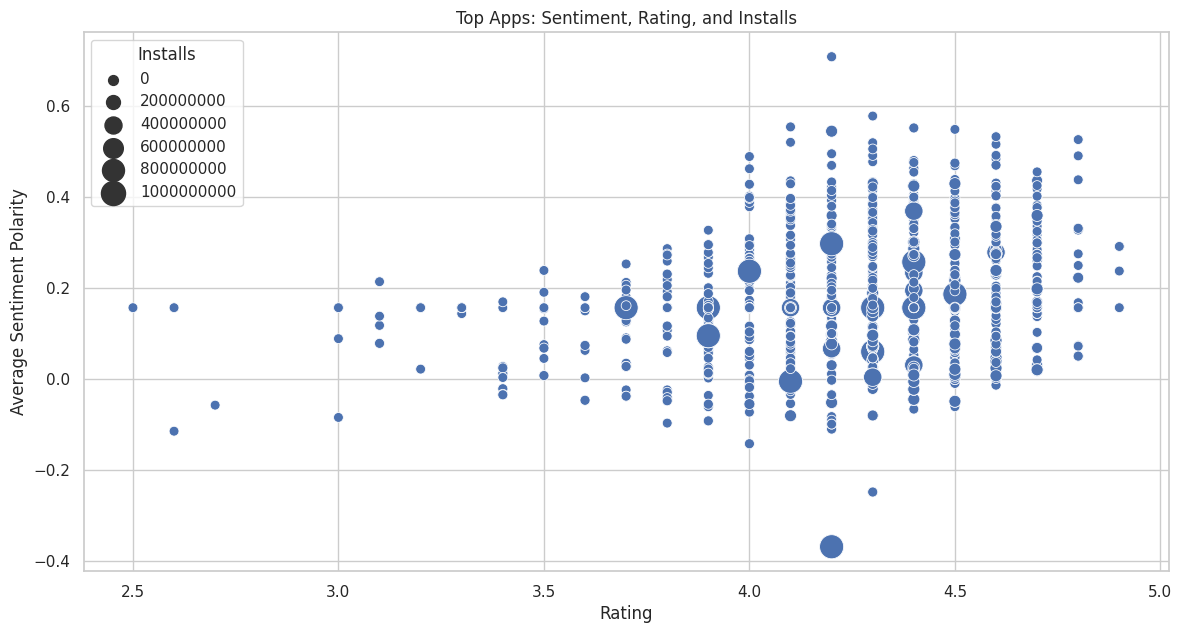

In [152]:
# Chart - 12 visualization code
# Relationship between Rating, Sentiment Polarity, and Installs
# Set style to 'whitegrid'
sns.set(style='whitegrid')

# Set up the plot
plt.figure(figsize=(14, 7))

# Scatter plot with size based on the number of installs
sns.scatterplot(x='Rating', y='Sentiment_Polarity', size='Installs', data=play_store_sentiment_df, sizes=(50, 300), edgecolor='white',legend=True)

# Customize the plot
plt.title('Top Apps: Sentiment, Rating, and Installs')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment Polarity')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

A bubble chart visually represents data points as bubbles, it's an extension of a scatter plot that uses the size of the data points to represent a third dimension of data, making it ideal for illustrating the relationships among three variables. So, I used it to explore the connections between average sentiment polarity, app rating, and the number of installs.

##### 2. What is/are the insight(s) found from the chart?


1. **Apps with higher ratings tend to have higher average sentiment polarity:** This correlation is logical, as users are more inclined to leave positive reviews for apps they enjoy using. This insight suggests that focusing on improving app quality and user satisfaction can lead to higher ratings and positive sentiment.
Niche Apps with High Sentiment Polarity:

2. **Some apps exhibit high average sentiment polarity despite having relatively low install counts:** This indicates the presence of niche apps that are deeply cherished by their user base, even though they may not enjoy widespread popularity. Businesses can explore opportunities to cater to specific user needs and build a loyal customer base.
Popularity vs. Sentiment Polarity Discrepancy:

3. **The large bubbles representing the most installed apps generally show lower average sentiment polarity:** This implies that widespread popularity doesn't consistently align with positive user sentiment. While these apps may have a broad user base, it's crucial for businesses to assess and address potential factors contributing to lower sentiment, such as user experience or feature improvements.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

###Positive Business Impact:
- **Identifying popular apps with high sentiment:** Focusing marketing efforts towards popular apps with high sentiment polarity can further boost their popularity and attract new users.

- **Promoting niche apps with high sentiment:** Promoting niche apps with high sentiment polarity can help them reach their target audience and achieve sustainable growth.

- **Understanding user sentiment variations:** By analyzing how sentiment polarity varies across different app features and user segments, developers can identify areas for improvement and implement changes to increase user satisfaction.

- **Prioritizing feedback based on popularity and sentiment:** Insights from the chart can guide developers in prioritizing user feedback based on both app popularity and user sentiment, ensuring resources are allocated effectively.

###Negative Growth Consideration:
- **Focusing solely on popular apps:** Focusing solely on promoting popular apps might neglect niche apps with high user satisfaction, potentially missing out on valuable market segments.

- **Misinterpreting sentiment polarity:** Taking average sentiment polarity at face value might lead to overlooking important aspects of user feedback. A deeper analysis of individual reviews is necessary to understand specific user concerns.

- **Ignoring install count trends:** Ignoring the relationship between install count and sentiment polarity might result in neglecting potential issues with popular apps, leading to user churn and dissatisfaction.

#### Chart - 13

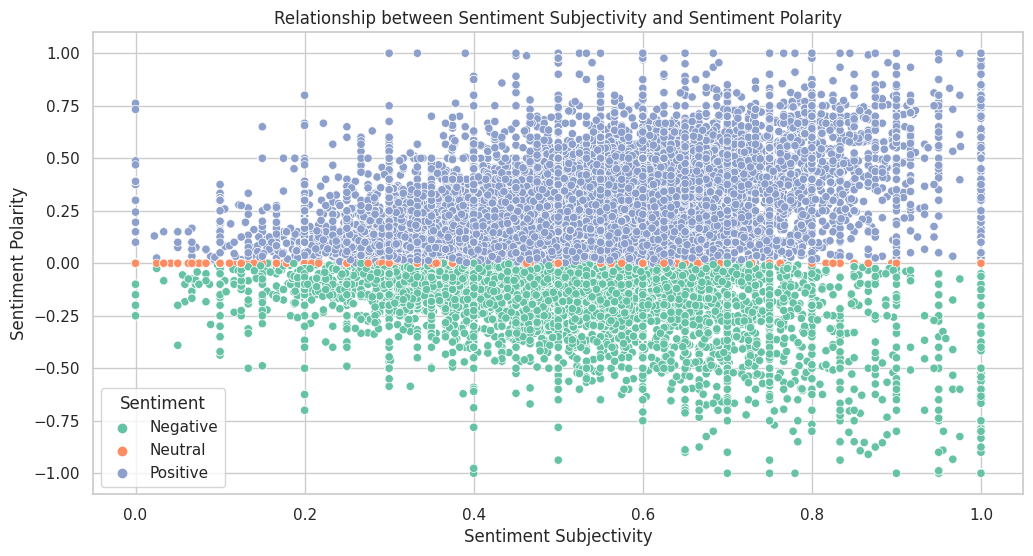

In [151]:
# Chart - 13 visualization code
# Relationship between Sentiment Subjectivity and Sentiment Polarity

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create a scatter plot using seaborn
sns.scatterplot(data=merged_df, x='Sentiment_Subjectivity', y='Sentiment_Polarity', hue='Sentiment', palette='Set2')

# Set labels for the x and y axes
plt.xlabel('Sentiment Subjectivity',)
plt.ylabel('Sentiment Polarity')

# Set the title of the plot
plt.title('Relationship between Sentiment Subjectivity and Sentiment Polarity')

# Display the plot
plt.show()


#### Chart - 14 - Correlation Heatmap

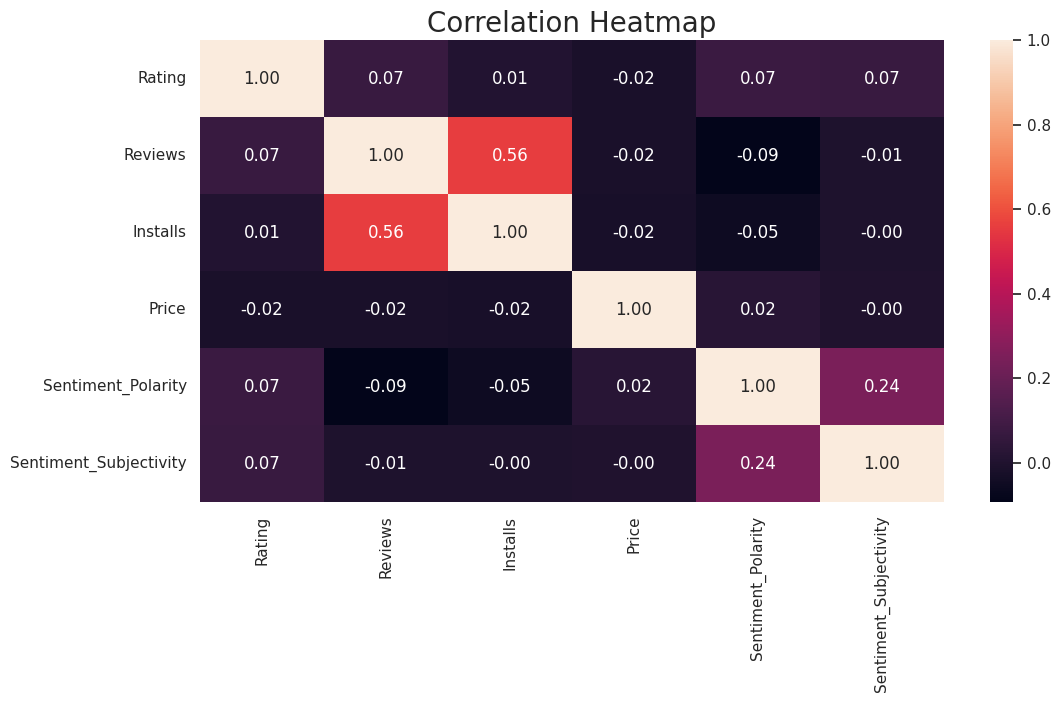

In [161]:
# Correlation Heatmap visualization code
# Selecting numerical columns from the merged dataframe
numerical_columns = merged_df[['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Sentiment_Polarity', 'Sentiment_Subjectivity']]

# Create a correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt=".2f")
plt.title('Correlation Heatmap',size=20)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

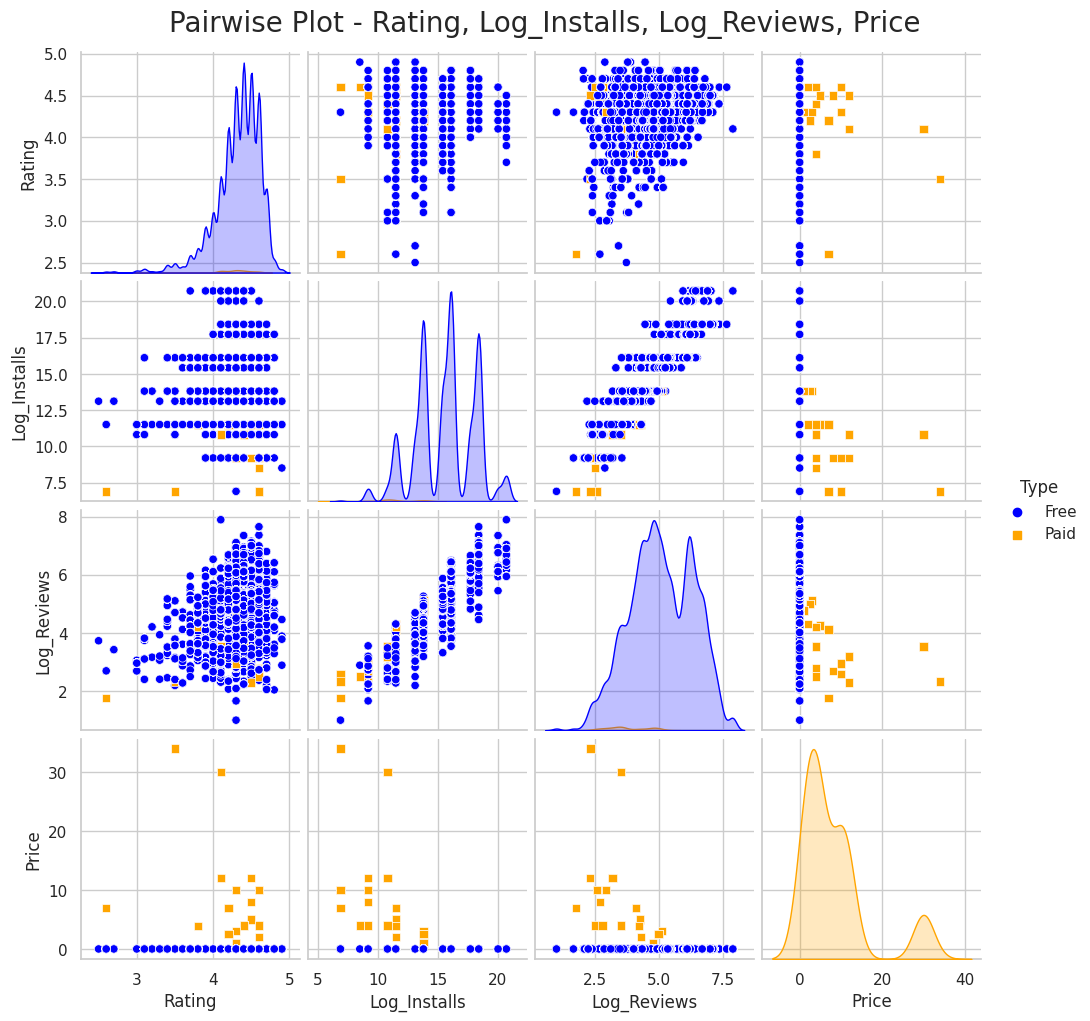

In [171]:
# Pair Plot visualization code

# Selecting numerical columns from the merged dataframe
included_columns = merged_df[['Rating', 'Reviews', 'Installs', 'Price', 'Type']]

# Log-transform 'Installs' and 'Reviews'
included_columns['Log_Installs'] = np.log(included_columns['Installs'])
included_columns['Log_Reviews'] = np.log10(included_columns['Reviews'])

# Selecting columns for pair plot
selected_columns = included_columns[['Rating', 'Log_Installs', 'Log_Reviews', 'Price', 'Type']]

# Create a pair plot
p = sns.pairplot(selected_columns, hue='Type', markers=["o", "s"], palette={"Free": "blue", "Paid": "orange"})
p.fig.suptitle("Pairwise Plot - Rating, Log_Installs, Log_Reviews, Price", x=0.5, y=1.02, fontsize=20)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***